# TC1002S Herramientas computacionales: el arte de la analítica

This is a notebook with all your work for the final evidence of this course


# Niveles de dominio a demostrar con la evidencia

### SING0202A

Interpreta interacciones entre variables relevantes en un problema, como base para la construcción de modelos bivariados basados en datos de un fenómeno investigado que le permita reproducir la respuesta del mismo. Es capaz de construir modelos bivariados que expliquen el comportamiento de un fenómeno.


# Student information

- Name: Sebastian Denhi Vega Saint Martin

- ID: A01637397

- My carreer: ITC


# Importing libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

# PART 1

## Do clustering using your assigned dataset

## a) Load data

In [6]:
# Load the a01.csv file
df = pd.read_csv('A01637397_X.csv')

## b) Data managment


Print the first 7 rows

In [7]:
df.head(7)

Unnamed: 0         x1         x2         x3         x4         x5  \
0           0  10.704460   2.163865   5.961924  -9.871042  11.009001   
1           1  -9.397195  12.967576   2.502653   8.656924   0.951469   
2           2  -4.986993  -5.931805   7.963487   8.027428   2.776160   
3           3  -8.468370   8.240626   7.000778   6.556425   0.232705   
4           4   8.623442  -3.632391  -2.047176   4.445862  -7.789228   
5           5  -3.901733  -3.265516  10.781469  12.567546   5.495719   
6           6  -9.220256   8.098857   5.811988   5.512589  -0.632531   

         x6        x7        x8         x9        x10       x11        x12  
0 -8.536877 -7.002612  4.200597  -7.006803   2.439322 -3.264908 -12.880818  
1 -0.976294  1.589109  8.777954 -11.726919 -11.641915  1.041017  -7.974521  
2 -1.241147  0.677944  3.843258  10.376413  -7.446526 -0.177489  -9.589378  
3 -4.697557 -1.570794  7.016995  -9.931352 -10.865295 -3.964144  -4.200816  
4  7.965599  5.224493 -7.272447  -1.999637   1.588705  0.034273   7.774342  
5 -2.745901  1.570670  4.298700   8.545554  -7.162202  1.447524  -4.190527  
6  0.463335 -5.250963  9.773090 -10.903893  -9.323534 -0.666745  -8.823081

Print the last 4 rows

In [8]:
df.tail(4)

Unnamed: 0        x1         x2        x3        x4        x5        x6  \
419         419  9.965610  -4.596722 -1.075863 -6.951161 -6.985648  8.678754   
420         420 -8.644075  11.175525  4.287576  6.811797 -2.288132  1.054456   
421         421 -9.924872   8.338007  4.019825  8.821082  0.301404 -5.306225   
422         422  9.321549  -6.765553  1.332532 -4.303304 -9.860667  8.495820   

           x7        x8         x9       x10       x11       x12  
419  6.536201  0.303749   4.129435 -9.767611  4.569105  2.184972  
420 -0.390459  5.971899 -11.509172 -7.908597  3.277344 -6.320836  
421  0.757619  7.259401  -7.803258 -9.626171 -3.770025 -9.656993  
422  9.611153 -2.145862   8.731826 -7.783790  7.164180  7.240551

How many rows and columns are in your data?

Use the `shape` method


In [9]:
df.shape

(423, 13)

Print the name of all columns

Use the `columns` method

In [10]:
df.columns

Index(['Unnamed: 0', 'x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9',
       'x10', 'x11', 'x12'],
      dtype='object')

What is the data type in each column

Use the `dtypes` method

In [11]:
df.dtypes

Unnamed: 0      int64
x1            float64
x2            float64
x3            float64
x4            float64
x5            float64
x6            float64
x7            float64
x8            float64
x9            float64
x10           float64
x11           float64
x12           float64
dtype: object

What is the meaning of rows and columns?

Your responses here

1. Rows are the observations (423)

2.  Columns are the varianbles we have (12)

3. The data type in the data set are floats
   

...

Print a statistical summary of your columns


In [12]:
df.describe()

Unnamed: 0          x1          x2          x3          x4          x5  \
count  423.000000  423.000000  423.000000  423.000000  423.000000  423.000000   
mean   211.000000    0.224074   -1.166432    1.553206    1.768499    0.013537   
std    122.253834    7.552219    6.458001    6.546957    6.564677    5.970602   
min      0.000000  -13.731455  -11.994677  -12.887297  -12.606536  -11.832848   
25%    105.500000   -7.134949   -6.208440   -4.728074   -5.654121   -5.848596   
50%    211.000000    2.236532   -3.227933    2.834245    4.532356    0.784515   
75%    316.500000    7.402365    3.963600    7.293150    6.730568    4.081149   
max    422.000000   12.975315   14.118818   12.762091   12.567546   13.052056   

               x6          x7          x8          x9         x10         x11  \
count  423.000000  423.000000  423.000000  423.000000  423.000000  423.000000   
mean     0.915020    0.691042    1.653510   -0.039531   -3.070120    1.578678   
std      5.931736    5.572635    5.885930    6.939713    4.849785    3.229990   
min    -14.722675  -10.175196  -12.509936  -14.010316  -15.359862   -6.016767   
25%     -2.147917   -3.956647   -3.844540   -6.727780   -7.321657   -0.900910   
50%      1.143418    0.396095    3.721084    0.235496   -3.021244    1.687785   
75%      5.906907    5.786842    6.073533    6.342155    1.115019    3.982192   
max     12.367643   12.266392   10.933168   12.226167    7.408353   10.705896   

              x12  
count  423.000000  
mean    -1.071854  
std      8.088841  
min    -14.402610  
25%     -8.522223  
50%     -0.711339  
75%      6.296225  
max     14.015691

1. What is the minumum and maximum values of each variable:
   
What we see in the row min:
min	0.000000	-13.731455	-11.994677	-12.887297	-12.606536	-11.832848	-14.722675	-10.175196	-12.509936	-14.010316	-15.359862	-6.016767	-14.402610

And max:
max	422.000000	12.975315	14.118818	12.762091	12.567546	13.052056	12.367643	12.266392	10.933168	12.226167	7.408353	10.705896	14.015691




2. What is the mean and standar deviation of each variable:

mean	211.000000	0.224074	-1.166432	1.553206	1.768499	0.013537	0.915020	0.691042	1.653510	-0.039531	-3.070120	1.578678	-1.071854

std	122.253834	7.552219	6.458001	6.546957	6.564677	5.970602	5.931736	5.572635	5.885930	6.939713	4.849785	3.229990	8.088841


3. What the 25%, 50% and 75% represent?:
25% (1st quartile): This represents the value below which 25% of the data falls.

50% (2nd quartile): This represents the value below which 50% of the data falls. It is the median of the data.

75% (3rd quartile): This represents the value below which 75% of the data falls.

Rename the columns using the same name with capital letters

In [13]:
df.columns = [col.upper() for col in df.columns]

df.columns

Index(['UNNAMED: 0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9',
       'X10', 'X11', 'X12'],
      dtype='object')

Rename the columns to their original names

In [17]:
df.columns = [col.lower() for col in df.columns]

df.columns

Index(['unnamed: 0', 'x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9',
       'x10', 'x11', 'x12'],
      dtype='object')

Use two different alternatives to get one of the columns

In [20]:
# Alternative 1: Using bracket notation
column_x1_bracket = df['x1']
print(column_x1_bracket)

# Alternative 2: Using dot notation
column_x1_dot = df.x1
print(column_x1_dot)

0      10.704460
1      -9.397195
2      -4.986993
3      -8.468370
4       8.623442
         ...    
418     7.833982
419     9.965610
420    -8.644075
421    -9.924872
422     9.321549
Name: x1, Length: 423, dtype: float64
0      10.704460
1      -9.397195
2      -4.986993
3      -8.468370
4       8.623442
         ...    
418     7.833982
419     9.965610
420    -8.644075
421    -9.924872
422     9.321549
Name: x1, Length: 423, dtype: float64


Get a slice of your data set: second and thrid columns and rows from 62 to 72

In [22]:
slice_df = df.iloc[62:73, 2:4]
print(slice_df)

           x2        x3
62  -8.089142 -2.978303
63  -6.074712  7.702880
64   6.506097  3.579153
65  -7.967435 -7.462639
66  -4.599705  7.627543
67  -5.960114  7.837275
68  -6.913356  1.877401
69 -10.182218  7.091357
70  -4.437816  8.150502
71  -8.176606  9.423267
72  -1.778505  9.388006


For the second and thrid columns, calculate the number of null and not null values and verify that their sum equals the total number of rows

In [24]:
# Calculate the number of null values in the second and third columns
null_values_x2 = df['x2'].isnull().sum()
null_values_x3 = df['x3'].isnull().sum()

# Calculate the number of not null values in the second and third columns
not_null_values_x2 = df['x2'].notnull().sum()
not_null_values_x3 = df['x3'].notnull().sum()

# Verify that the sum of null and not null values equals the total number of rows
total_rows = df.shape[0]
verify_x2 = (null_values_x2 + not_null_values_x2) == total_rows
verify_x3 = (null_values_x3 + not_null_values_x3) == total_rows

print(f"Null values in x2: {null_values_x2}, Not null values in x2: {not_null_values_x2}, Verification: {verify_x2}")
print(f"Null values in x3: {null_values_x3}, Not null values in x3: {not_null_values_x3}, Verification: {verify_x3}")

Null values in x2: 0, Not null values in x2: 423, Verification: True
Null values in x3: 0, Not null values in x3: 423, Verification: True


Discard the last column


In [ ]:
df = df.drop(df.columns[-1], axis=1)
df.columns

### Questions

Based on the previos results, provide a full description of yout dataset

Your response:

Overall, the dataset appears to be well-structured and ready for further analysis.

The statistical summary of the dataset shows a range of values for each variable, with the minimum and maximum values indicating the spread of the data.
There are no missing values in the dataset, as verified by the null and not null value counts.
The dataset consists of 423 observations (rows) and 13 variables (columns). Each row represents an observation, and each column represents a variable. The variables are named from 'x1' to 'x12' and an additional 'unnamed: 0' column which seems to be an index column. All variables are of type float64, except for the 'unnamed: 0' column which is of type int64




## c) Data visualization

Plot in the histogram of one of the variables

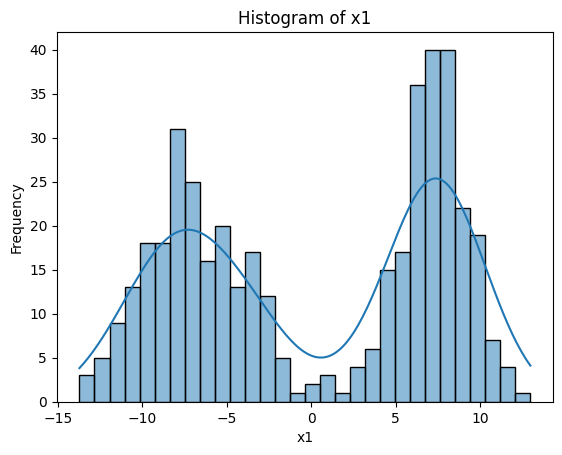

In [26]:
sns.histplot(df['x1'], bins=30, kde=True)
plt.title('Histogram of x1')
plt.xlabel('x1')
plt.ylabel('Frequency')
plt.show()

Plot in the same figure the histogram of two variables



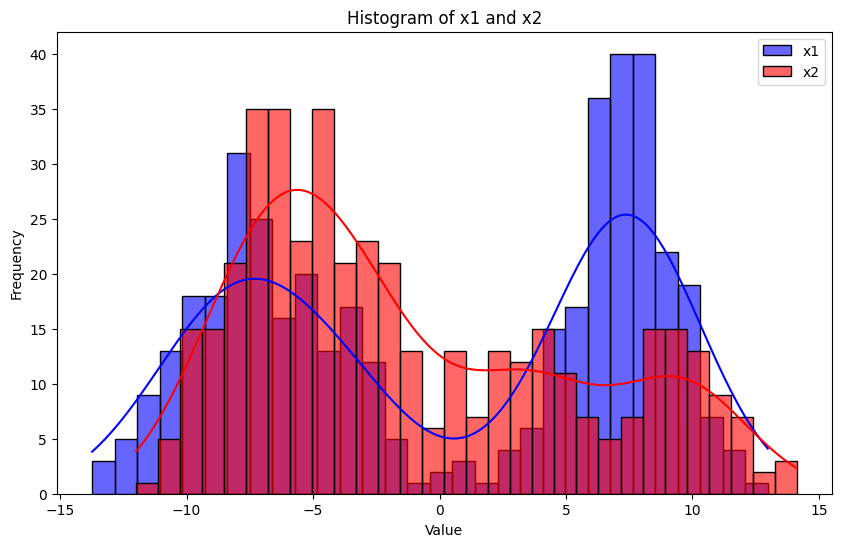

In [27]:
plt.figure(figsize=(10, 6))
sns.histplot(df['x1'], bins=30, kde=True, color='blue', label='x1', alpha=0.6)
sns.histplot(df['x2'], bins=30, kde=True, color='red', label='x2', alpha=0.6)
plt.title('Histogram of x1 and x2')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.legend()
plt.show()

Based on these plots, provide a description of your data:

Your response here:

Histogram of x1: The variable x1 shows a clear bimodal distribution, with two distinct peaks around -7 and 8. This suggests that the data for x1 might represent two different groups or clusters.
Histogram of x1 and x2: When we compare x1 and x2, both distributions have somewhat similar ranges, between -15 and 15, but x2 appears more centered around 0, unlike x1. The overlap between the two variables suggests that they may share some relationship or interaction, but they also have distinct characteristics that separate them.

These plots suggest that the data might involve multiple clusters, especially for the variable x1, which shows two clear groups. Meanwhile, x2 follows a more centralized distribution, but there is some overlap with x1. Comparison with more variables may help to understand better th data



Plot the boxplot of one of the variables

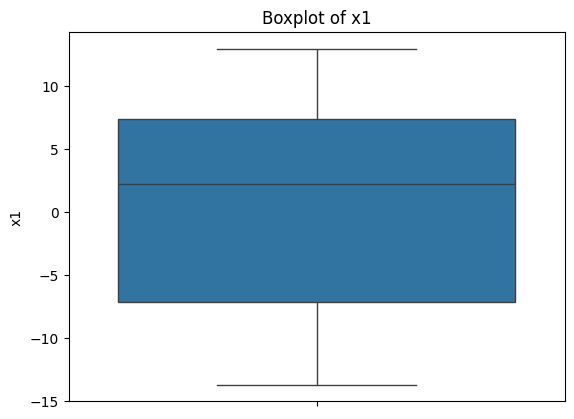

In [28]:
sns.boxplot(y=df['x1'])
plt.title('Boxplot of x1')
plt.ylabel('x1')
plt.show()

Plot in the same figure the boxplot of two variables

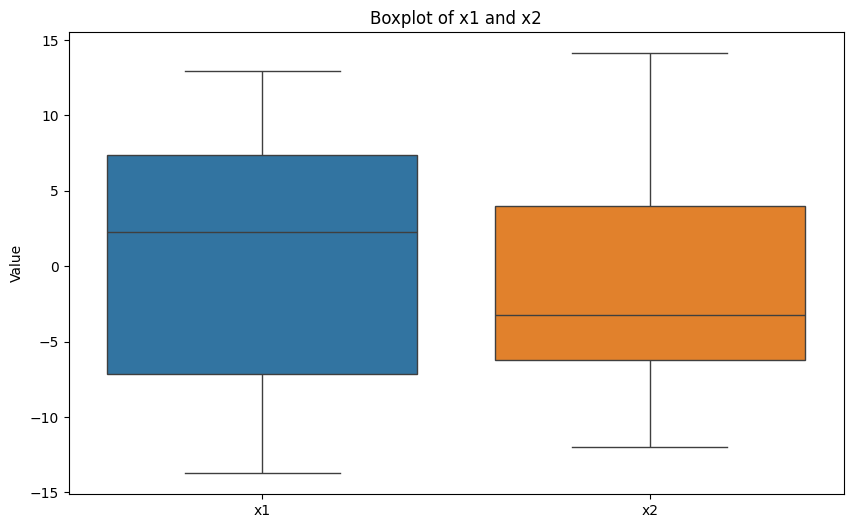

In [29]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[['x1', 'x2']])
plt.title('Boxplot of x1 and x2')
plt.ylabel('Value')
plt.show()

Based on these plots, provide a description of your data:

Your response here:

The boxplots show that both variables, x1 and x2, span a similar range but have different levels of variability. x1 has a larger spread, suggesting it captures more diverse data points, whereas x2 is more concentrated. This variability could be important when performing clustering, as x1 might play a more significant role in separating different clusters due to its broader distribution.

Plot the scatter plot between all pair of variables

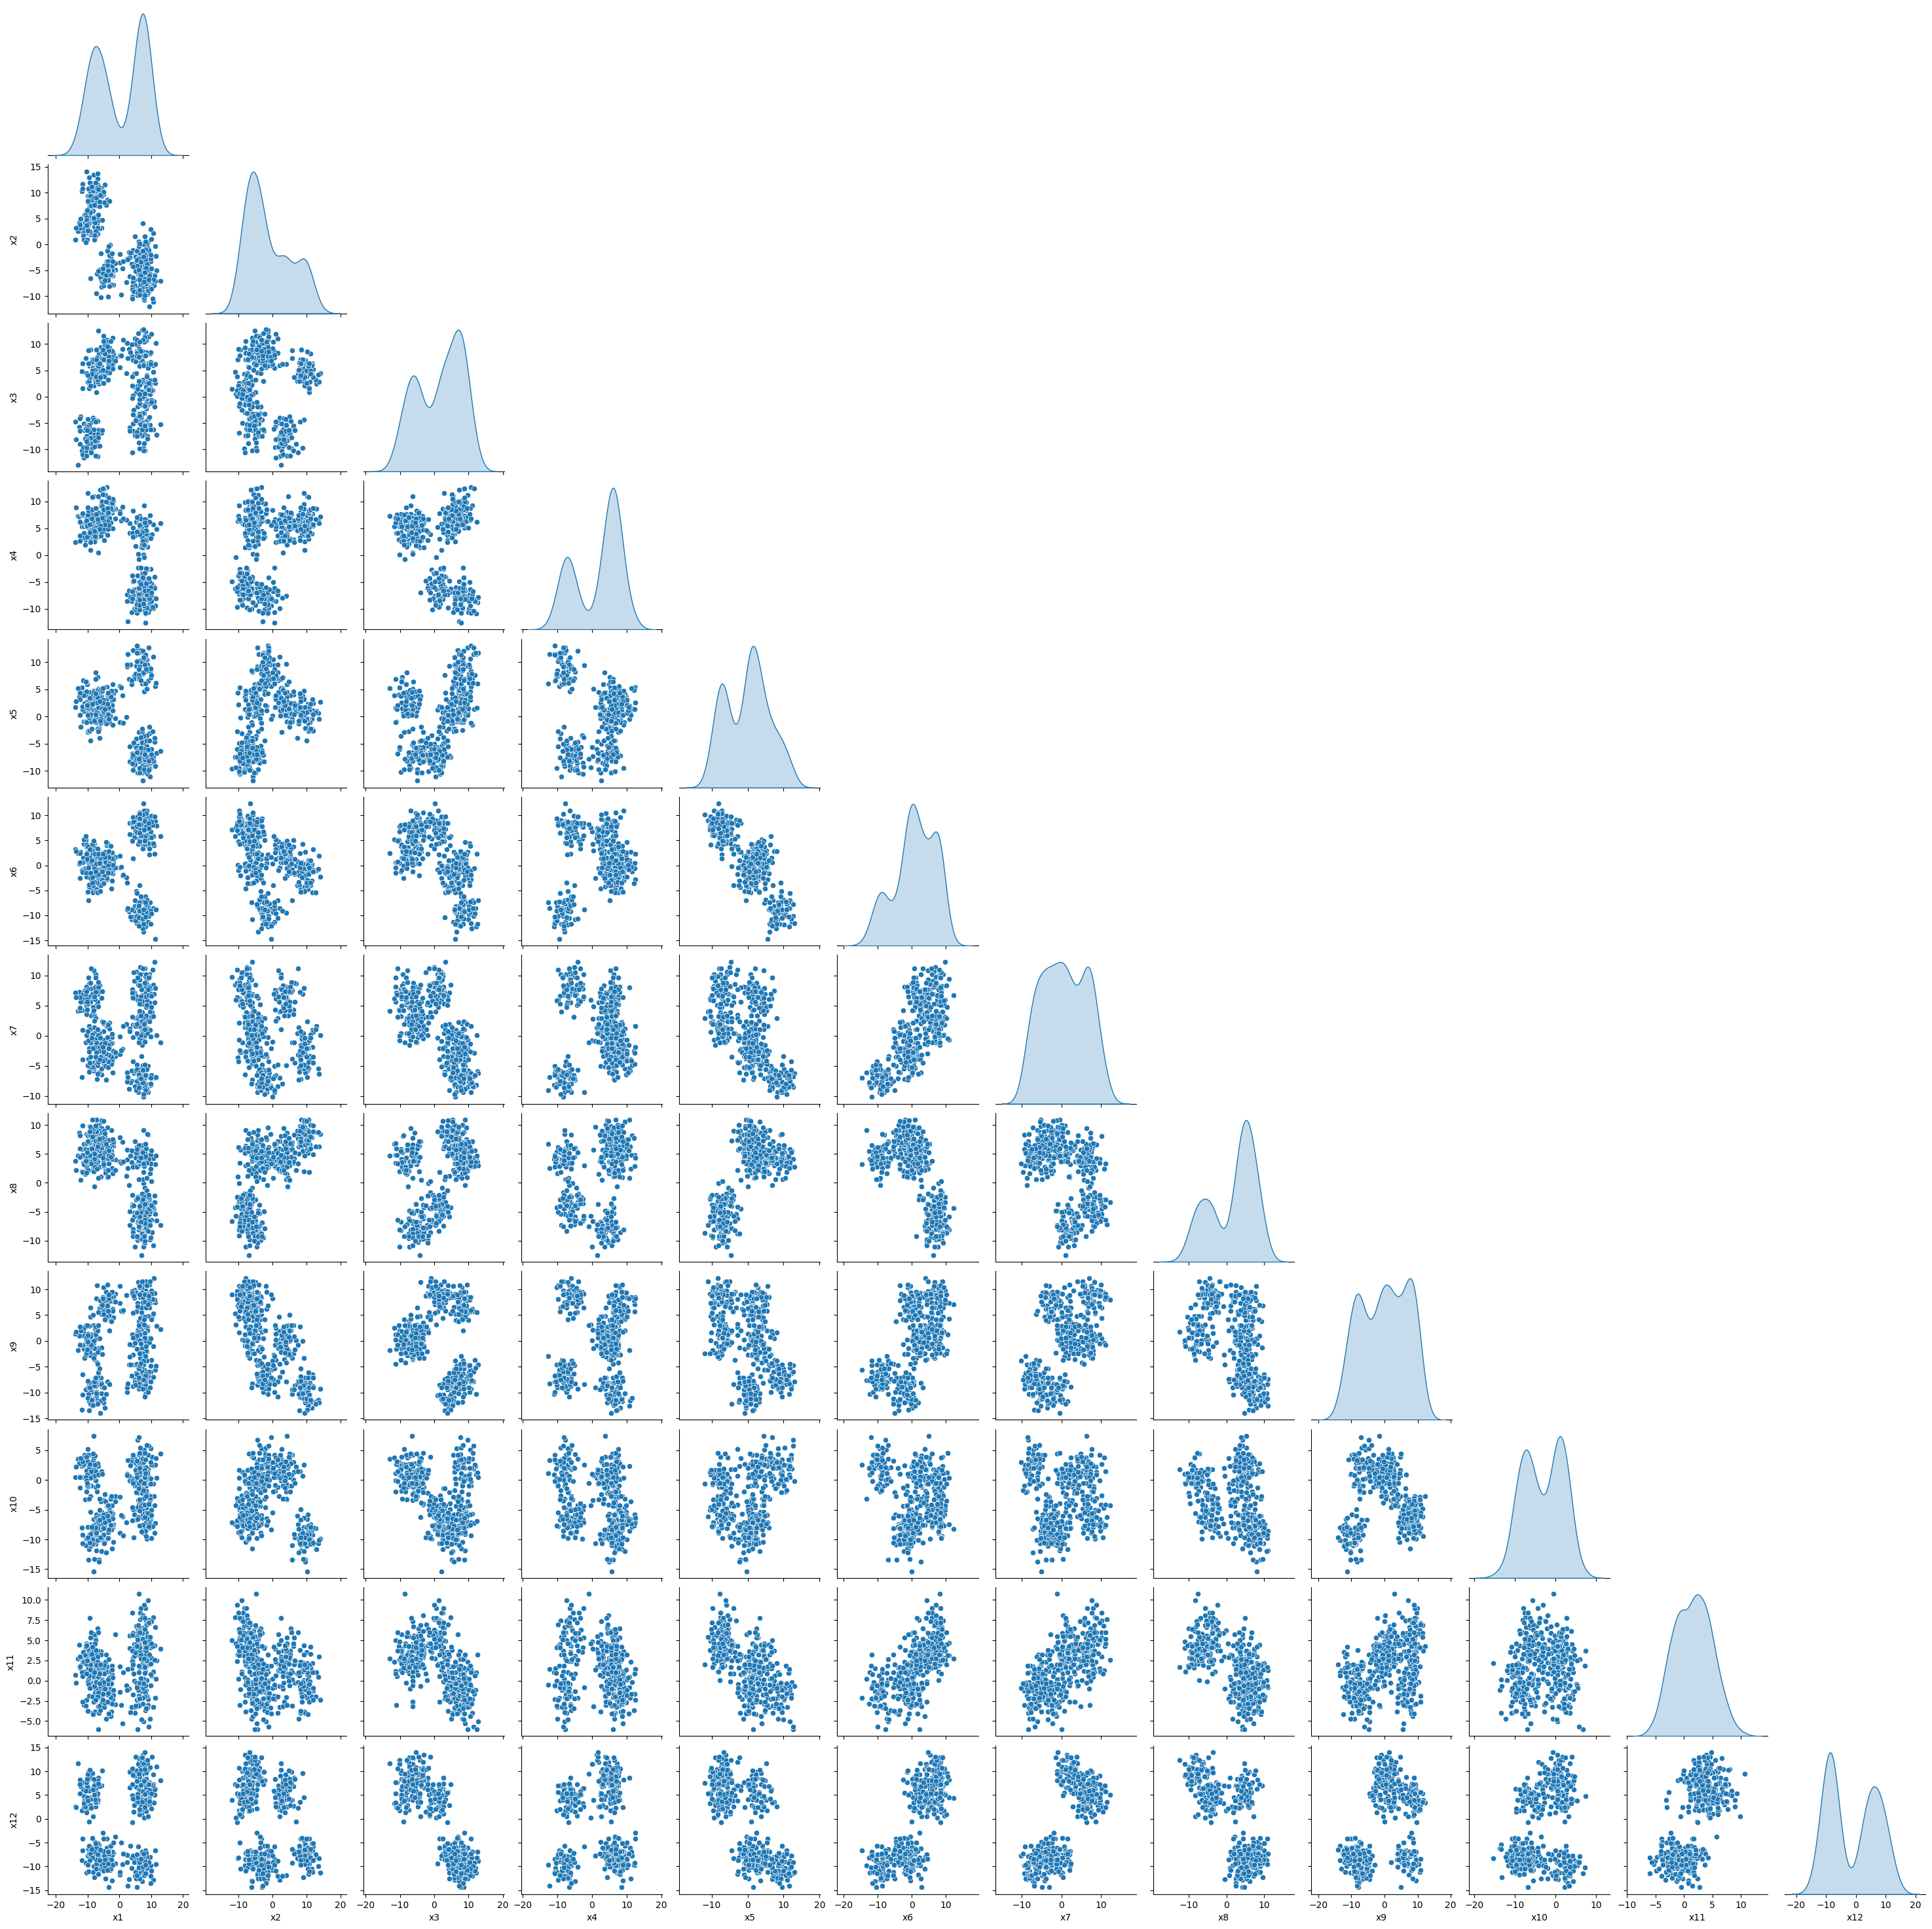

In [36]:
# Excluir la columna 'unnamed: 0'
df_excl_unnamed = df.drop(columns=['unnamed: 0'])

sns.pairplot(df_excl_unnamed, 
             diag_kind="kde",
             corner=True
             )
plt.show()


### Questions

Based on the previos plots, provide a full description of yout dataset

Your response:


Distributions: Variables like x1 and x3 are bimodal or multimodal but some others dont show clear potential for clustering.

Variable Relationships: The correlation between variables dont show a clear group distribution but they all show 2-4 groups.


I do think after seeing them all the correct number of groups is going to be 3


## d) Kmeans

Do Kmeans clustering assuming a number of clusters accorging to your scatter plots

In [39]:
# Perform KMeans clustering with 3 clusters
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(df_excl_unnamed)



KMeans(n_clusters=3, random_state=42)

Add to your dataset a column with the estimated cluster to each data point

In [40]:
# Add the cluster labels to the dataframe
df['cluster'] = kmeans.labels_

# Print the first few rows to verify the cluster labels
df.head(7)

unnamed: 0         x1         x2         x3         x4         x5  \
0           0  10.704460   2.163865   5.961924  -9.871042  11.009001   
1           1  -9.397195  12.967576   2.502653   8.656924   0.951469   
2           2  -4.986993  -5.931805   7.963487   8.027428   2.776160   
3           3  -8.468370   8.240626   7.000778   6.556425   0.232705   
4           4   8.623442  -3.632391  -2.047176   4.445862  -7.789228   
5           5  -3.901733  -3.265516  10.781469  12.567546   5.495719   
6           6  -9.220256   8.098857   5.811988   5.512589  -0.632531   

         x6        x7        x8         x9        x10       x11        x12  \
0 -8.536877 -7.002612  4.200597  -7.006803   2.439322 -3.264908 -12.880818   
1 -0.976294  1.589109  8.777954 -11.726919 -11.641915  1.041017  -7.974521   
2 -1.241147  0.677944  3.843258  10.376413  -7.446526 -0.177489  -9.589378   
3 -4.697557 -1.570794  7.016995  -9.931352 -10.865295 -3.964144  -4.200816   
4  7.965599  5.224493 -7.272447  -1.999637   1.588705  0.034273   7.774342   
5 -2.745901  1.570670  4.298700   8.545554  -7.162202  1.447524  -4.190527   
6  0.463335 -5.250963  9.773090 -10.903893  -9.323534 -0.666745  -8.823081   

   cluster  
0        1  
1        2  
2        1  
3        2  
4        0  
5        1  
6        2

Print the number associated to each cluster

In [41]:
cluster_counts = df['cluster'].value_counts()
print(cluster_counts)

cluster
2    142
0    141
1    140
Name: count, dtype: int64


Print the centroids

In [42]:
centroids = kmeans.cluster_centers_
print(centroids)

[[ 7.52368432 -6.84182162 -2.15219132 -0.7139598  -7.02868665  7.1856969
   4.75188493 -5.9149142   4.67778376 -2.97330176  4.61697842  6.97327713]
 [ 1.67212906 -3.53229055  8.29751557  0.14783202  5.57042015 -4.55575752
  -4.57110122  4.68257556  0.13017236 -2.15217743 -1.11712004 -9.1932557 ]
 [-8.45178952  6.80152673 -1.41680979  5.83131729  1.52754999  0.08222613
   1.8468261   6.18223235 -4.89093709 -4.07126883  1.21960268 -1.05331493]]


Print the intertia metric

In [43]:
inertia = kmeans.inertia_
print(f"Inertia: {inertia}")

Inertia: 84267.76604273099


Plot a scatter plot of your data using different color for each cluster. Also plot the centroids

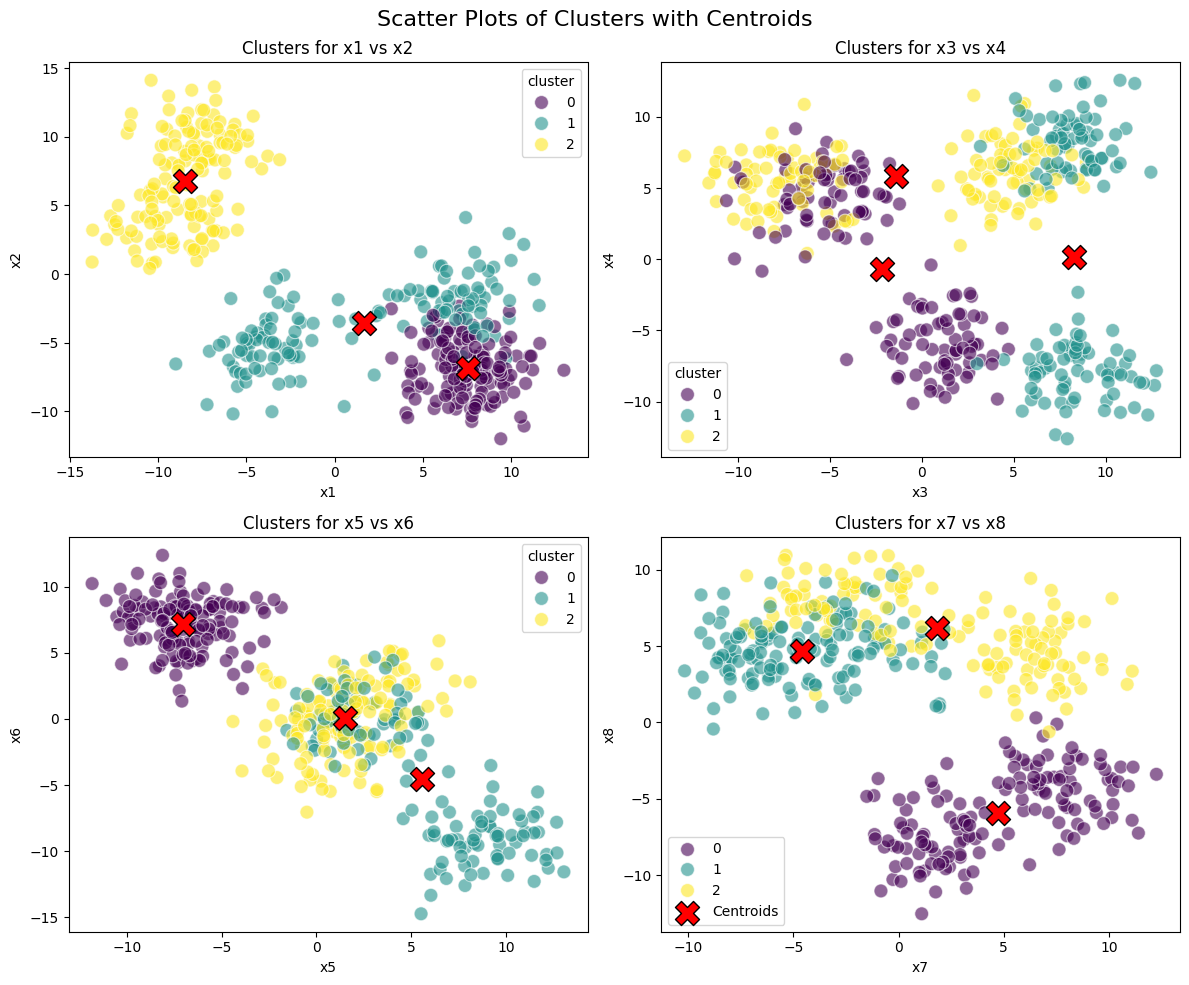

In [45]:
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

# Plot for x1 vs x2
sns.scatterplot(x=df['x1'], y=df['x2'], hue=df['cluster'], palette='viridis', s=100, alpha=0.6, edgecolor='w', ax=axs[0, 0])
axs[0, 0].scatter(centroids[:, 0], centroids[:, 1], s=300, c='red', marker='X', edgecolor='k', label='Centroids')
axs[0, 0].set_title('Clusters for x1 vs x2')

# Plot for x3 vs x4
sns.scatterplot(x=df['x3'], y=df['x4'], hue=df['cluster'], palette='viridis', s=100, alpha=0.6, edgecolor='w', ax=axs[0, 1])
axs[0, 1].scatter(centroids[:, 2], centroids[:, 3], s=300, c='red', marker='X', edgecolor='k', label='Centroids')
axs[0, 1].set_title('Clusters for x3 vs x4')

# Plot for x5 vs x6
sns.scatterplot(x=df['x5'], y=df['x6'], hue=df['cluster'], palette='viridis', s=100, alpha=0.6, edgecolor='w', ax=axs[1, 0])
axs[1, 0].scatter(centroids[:, 4], centroids[:, 5], s=300, c='red', marker='X', edgecolor='k', label='Centroids')
axs[1, 0].set_title('Clusters for x5 vs x6')

# Plot for x7 vs x8
sns.scatterplot(x=df['x7'], y=df['x8'], hue=df['cluster'], palette='viridis', s=100, alpha=0.6, edgecolor='w', ax=axs[1, 1])
axs[1, 1].scatter(centroids[:, 6], centroids[:, 7], s=300, c='red', marker='X', edgecolor='k', label='Centroids')
axs[1, 1].set_title('Clusters for x7 vs x8')


fig.suptitle('Scatter Plots of Clusters with Centroids', fontsize=16)
plt.legend()
plt.tight_layout()
plt.show()


### Questions

Provides a detailed description of your results

Your response:

Cluster Formation: The data is divided into three distinct clusters. Each scatter plot shows groupings, with centroids (red 'X').
Separation: Clusters are generally well-separated in these variable pairs, though some are not cleared and they are overlapped

## d) Elbow plot

Compute the Elbow plot

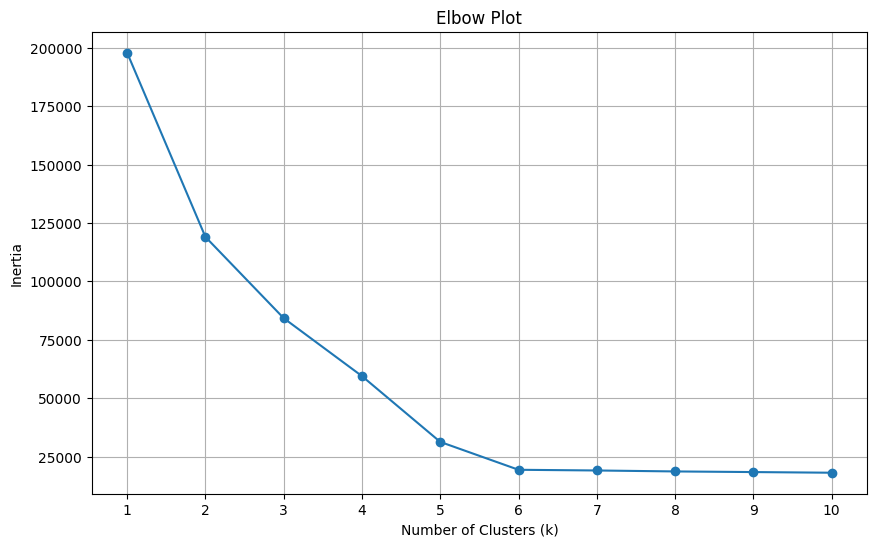

In [46]:
inertia_values = []
k_values = range(1, 11)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_excl_unnamed)
    inertia_values.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(k_values, inertia_values, marker='o')
plt.title('Elbow Plot')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.xticks(k_values)
plt.grid(True)
plt.show()

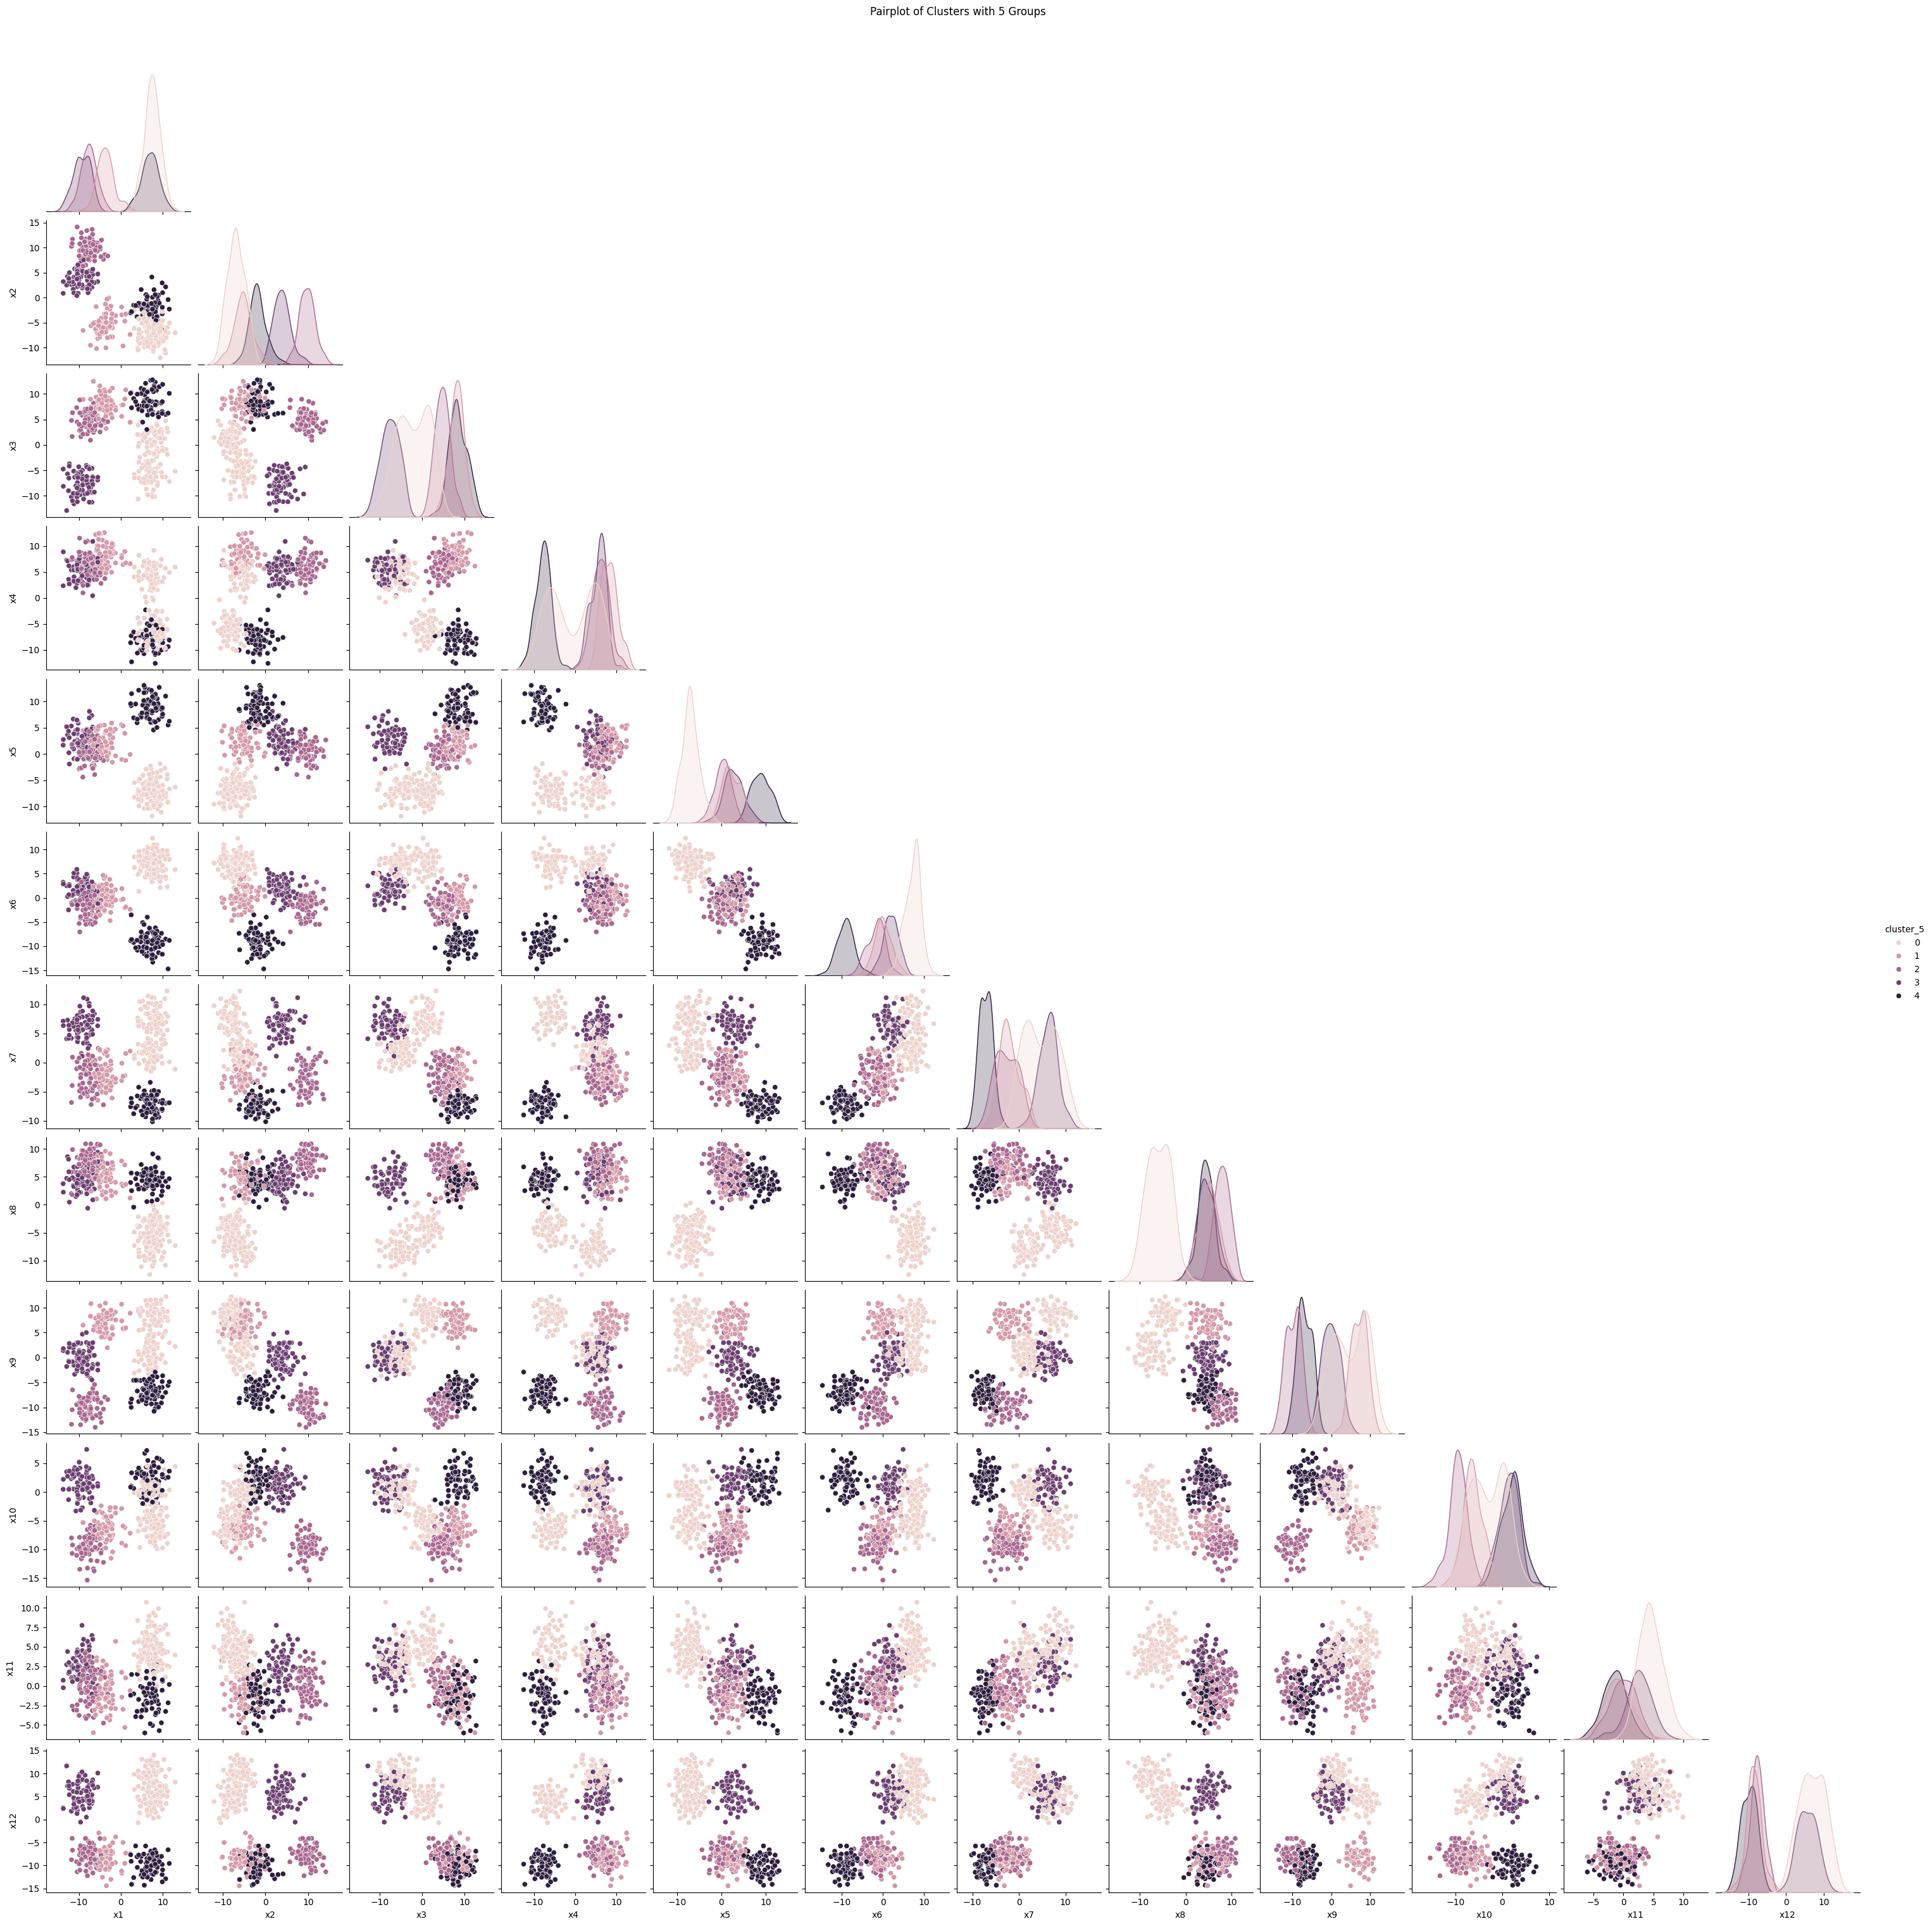

In [49]:
# Perform KMeans clustering with 5 clusters
kmeans_5 = KMeans(n_clusters=5, random_state=42)
kmeans_5.fit(df_excl_unnamed)

# Add the cluster labels to the dataframe
df_excl_unnamed['cluster_5'] = kmeans_5.labels_

# Plot the pairplot to visualize the clusters
sns.pairplot(df_excl_unnamed, hue='cluster_5', diag_kind="kde", corner=True)
plt.suptitle('Pairplot of Clusters with 5 Groups', y=1.02)
plt.show()

### Questions

What is the best number of clusters K? (argue your response)


Your response:

The best number after seeing the plot is 5 because its the elbow (The value after the change of inertia tends to be linear)

Does this number of clusters agree with your inital guess? (argue your response, no problem at all if they do not agree)

Your response:

No they didnt agree. I do think I maybe should have analyze more the data to try and see more patterns.


# PART 2

## Do clustering using the "digits" dataset

1) Load the dataset from "sklearn.datasets"


In [50]:
from sklearn.datasets import load_digits

# Load the digits dataset
digits = load_digits()

# Print the keys of the dataset to understand its structure
print(digits.keys())

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])


2) Plot some of the observations (add in the title the label/digit of that obserbation)

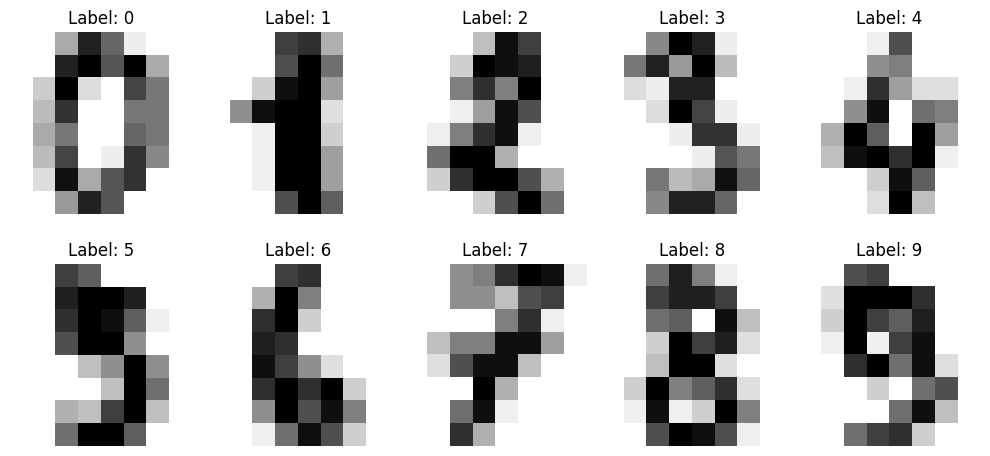

In [53]:
fig, axes = plt.subplots(2, 5, figsize=(10, 5))
for i, ax in enumerate(axes.flat):
    ax.imshow(digits.images[i], cmap='gray_r')
    ax.set_title(f"Label: {digits.target[i]}")
    ax.axis('off')
plt.tight_layout()
plt.show()

3) Do K means clustering in the following cases:

* KmeansAll: Using all 64 variables/pixels/features

* Kmeans1row: Using only the 8 variables/pixels/features from the firt row

* Kmeans4row: Using only the 8 variables/pixels/features from the fourth row

* Kmeans8row: Using only the 8 variables/pixels/
features from the eighth row


In [54]:
# KMeans clustering using all 64 variables/pixels/features
kmeans_all = KMeans(n_clusters=10, random_state=42)
kmeans_all.fit(digits.data)
digits['kmeans_all'] = kmeans_all.labels_

# KMeans clustering using only the 8 variables/pixels/features from the first row
kmeans_1row = KMeans(n_clusters=10, random_state=42)
kmeans_1row.fit(digits.data[:, :8])
digits['kmeans_1row'] = kmeans_1row.labels_

# KMeans clustering using only the 8 variables/pixels/features from the fourth row
kmeans_4row = KMeans(n_clusters=10, random_state=42)
kmeans_4row.fit(digits.data[:, 24:32])
digits['kmeans_4row'] = kmeans_4row.labels_

# KMeans clustering using only the 8 variables/pixels/features from the eighth row
kmeans_8row = KMeans(n_clusters=10, random_state=42)
kmeans_8row.fit(digits.data[:, 56:64])
digits['kmeans_8row'] = kmeans_8row.labels_

# Print the cluster labels for verification
print("Cluster labels using all 64 features:", digits['kmeans_all'][:10])
print("Cluster labels using first row features:", digits['kmeans_1row'][:10])
print("Cluster labels using fourth row features:", digits['kmeans_4row'][:10])
print("Cluster labels using eighth row features:", digits['kmeans_8row'][:10])

Cluster labels using all 64 features: [5 7 7 6 4 9 2 0 8 9]
Cluster labels using first row features: [2 9 3 1 5 4 9 0 1 4]
Cluster labels using fourth row features: [8 1 7 3 9 1 4 0 6 5]
Cluster labels using eighth row features: [3 5 6 5 0 1 5 2 1 7]


4) Verify your results. Plot several observations from the same digit and add in the title the real label and the estimated label to check in what observations the clusterization was correct or incorrect

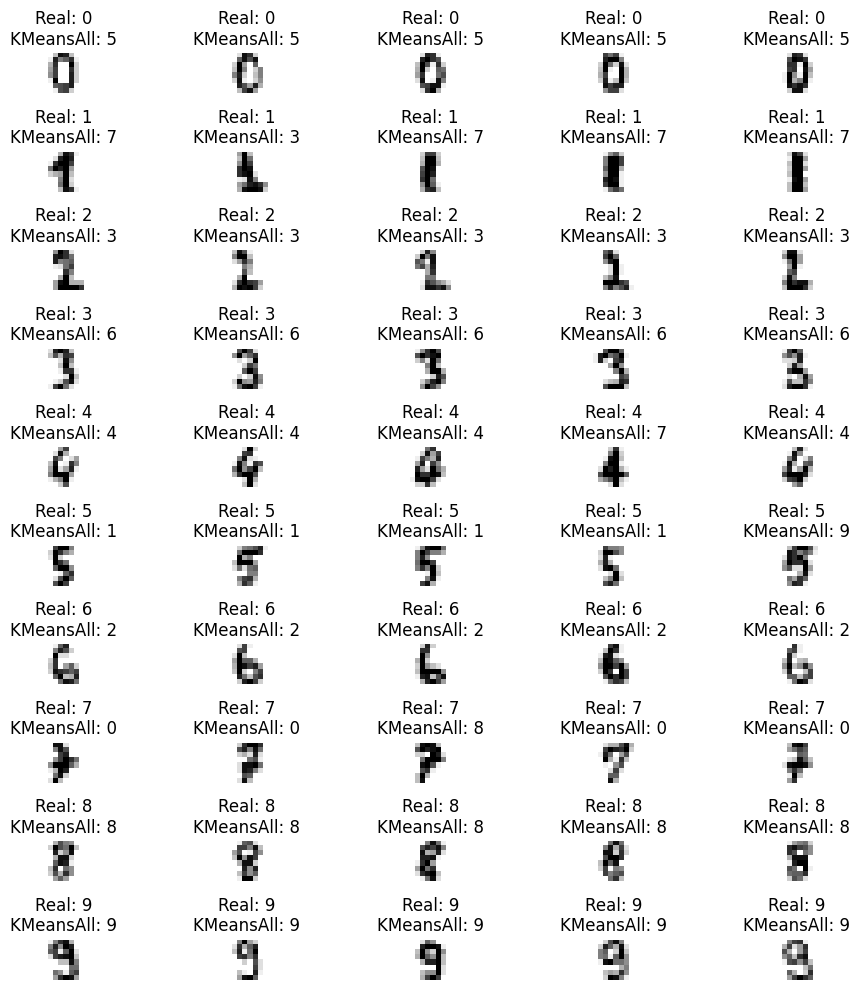

In [55]:
# Number of samples to plot for each digit
num_samples = 5

# Create a figure to plot the samples
fig, axes = plt.subplots(10, num_samples, figsize=(10, 10))

# Plot samples for each digit
for digit in range(10):
    digit_indices = np.where(digits.target == digit)[0]
    selected_indices = np.random.choice(digit_indices, num_samples, replace=False)
    
    for i, ax in enumerate(axes[digit]):
        index = selected_indices[i]
        ax.imshow(digits.images[index], cmap='gray_r')
        ax.set_title(f"Real: {digits.target[index]}\nKMeansAll: {digits['kmeans_all'][index]}")
        ax.axis('off')

plt.tight_layout()
plt.show()

5) Compute the Elbow plot

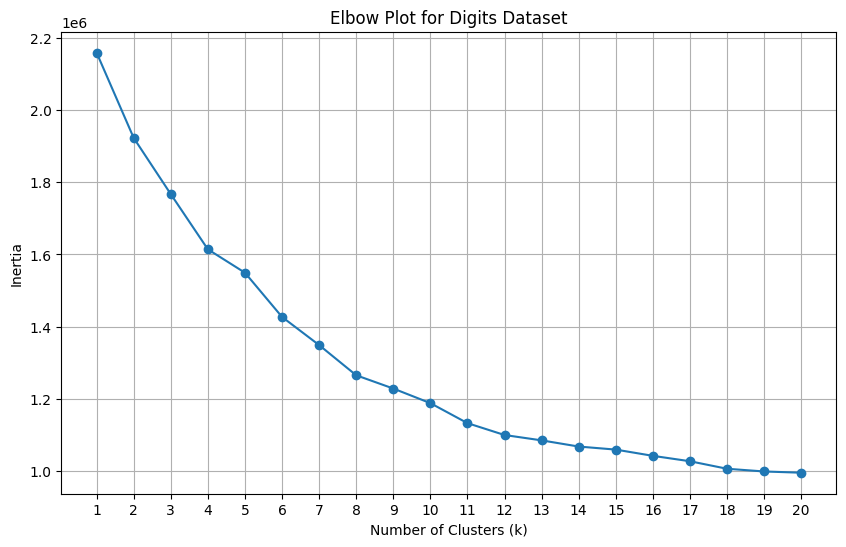

In [58]:
inertia_values_digits = []
k_values_digits = range(1, 21)

for k in k_values_digits:
    kmeans_digits = KMeans(n_clusters=k, random_state=42)
    kmeans_digits.fit(digits.data)
    inertia_values_digits.append(kmeans_digits.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(k_values_digits, inertia_values_digits, marker='o')
plt.title('Elbow Plot for Digits Dataset')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.xticks(k_values_digits)
plt.grid(True)
plt.show()

### Questions

Provides a detailed description of your results (e.g., in which case the clusterization is better, with KmeansAll, Kmeans1row, Kmeans4row, or Kmeans8row).

Your response (argue your response):

# PART 3
## Do classification using the "digits" dataset

1) Load the dataset from "sklearn.datasets"

In [77]:
from sklearn.datasets import load_digits

# Load the digits dataset
digits2 = load_digits()

# Print the keys of the dataset to understand its structure
print(digits2.keys())

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])


2) Plot some of the observations  (add in the title the label/digit of that obserbation)

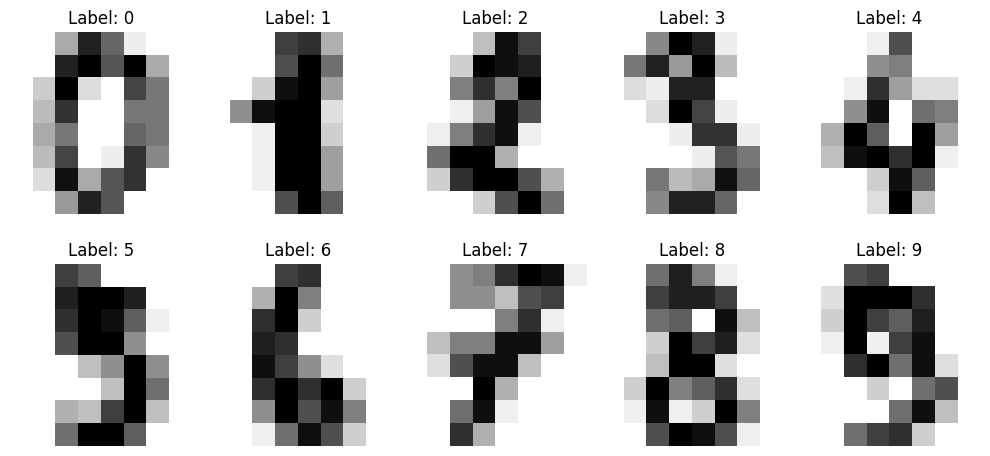

In [78]:
fig, axes = plt.subplots(2, 5, figsize=(10, 5))
for i, ax in enumerate(axes.flat):
    ax.imshow(digits2.images[i], cmap='gray_r')
    ax.set_title(f"Label: {digits2.target[i]}")
    ax.axis('off')
plt.tight_layout()
plt.show()

3) Split the dataset in train and test

In [79]:
from sklearn.model_selection import train_test_split

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(digits2.data, digits2.target, test_size=0.3, random_state=42)


4) Tune a classifier (Use the train set) in the following cases:

* ClassifierAll: Using all 64 variables/pixels/features

* Classifier1col: Using only the 8 variables/pixels/features from the firt column

* Classifier4col: Using only the 8 variables/pixels/features from the fourth column

* Classifier8col: Using only the 8 variables/pixels/
features from the eighth column

Note: in these four cases always use the same classification algorithm, e.g., a Suport Vector Machine


In [80]:
from sklearn.svm import SVC


# Case 1: ClassifierAll - Using all 64 variables/pixels/features
svm_classifier = SVC(kernel='linear', random_state=42)
svm_classifier.fit(X_train, y_train)


# Case 2: Classifier1col - Using only the 8 variables/pixels/features from the first column
svm_classifier1 = SVC(kernel='linear', random_state=42)
svm_classifier1.fit(X_train[:, :8], y_train)


# Case 3: Classifier4col - Using only the 8 variables/pixels/features from the fourth column
svm_classifier4 = SVC(kernel='linear', random_state=42)
svm_classifier4.fit(X_train[:, 24:32], y_train)


# Case 4: Classifier8col - Using only the 8 variables/pixels/features from the eighth column
svm_classifier8 = SVC(kernel='linear', random_state=42)
svm_classifier8.fit(X_train[:, 56:64], y_train)


SVC(kernel='linear', random_state=42)

5) Make predictions (use the test set)

In [81]:
# Case 1: ClassifierAll - Using all 64 variables/pixels/features
y_pred_all = svm_classifier.predict(X_test)

# Case 2: Classifier1col - Using only the 8 variables/pixels/features from the first column
y_pred_1col = svm_classifier1.predict(X_test[:, :8])

# Case 3: Classifier4col - Using only the 8 variables/pixels/features from the fourth column
y_pred_4col = svm_classifier4.predict(X_test[:, 24:32])

# Case 4: Classifier8col - Using only the 8 variables/pixels/features from the eighth column
y_pred_8col = svm_classifier8.predict(X_test[:, 56:64])

6) Compute performance metrics

In [82]:
from sklearn.metrics import accuracy_score, classification_report

# Case 1: ClassifierAll - Using all 64 variables/pixels/features
accuracy_all = accuracy_score(y_test, y_pred_all)
report_all = classification_report(y_test, y_pred_all)
print(f"Accuracy (All features): {accuracy_all}")
print(f"Classification Report (All features):\n{report_all}")

# Case 2: Classifier1col - Using only the 8 variables/pixels/features from the first column
accuracy_1col = accuracy_score(y_test, y_pred_1col)
report_1col = classification_report(y_test, y_pred_1col)
print(f"Accuracy (First column features): {accuracy_1col}")
print(f"Classification Report (First column features):\n{report_1col}")

# Case 3: Classifier4col - Using only the 8 variables/pixels/features from the fourth column
accuracy_4col = accuracy_score(y_test, y_pred_4col)
report_4col = classification_report(y_test, y_pred_4col)
print(f"Accuracy (Fourth column features): {accuracy_4col}")
print(f"Classification Report (Fourth column features):\n{report_4col}")

# Case 4: Classifier8col - Using only the 8 variables/pixels/features from the eighth column
accuracy_8col = accuracy_score(y_test, y_pred_8col)
report_8col = classification_report(y_test, y_pred_8col)
print(f"Accuracy (Eighth column features): {accuracy_8col}")
print(f"Classification Report (Eighth column features):\n{report_8col}")

Accuracy (All features): 0.9796296296296296
Classification Report (All features):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        53
           1       0.98      0.98      0.98        50
           2       0.98      1.00      0.99        47
           3       1.00      0.96      0.98        54
           4       0.98      0.98      0.98        60
           5       0.97      0.97      0.97        66
           6       1.00      1.00      1.00        53
           7       0.96      0.98      0.97        55
           8       0.95      0.98      0.97        43
           9       0.97      0.95      0.96        59

    accuracy                           0.98       540
   macro avg       0.98      0.98      0.98       540
weighted avg       0.98      0.98      0.98       540

Accuracy (First column features): 0.3962962962962963
Classification Report (First column features):
              precision    recall  f1-score   support

    

7) Verify your results. Plot several observations from the same digit and add in the title the real label and the estimated label to check in what observations the classification was correct or incorrect

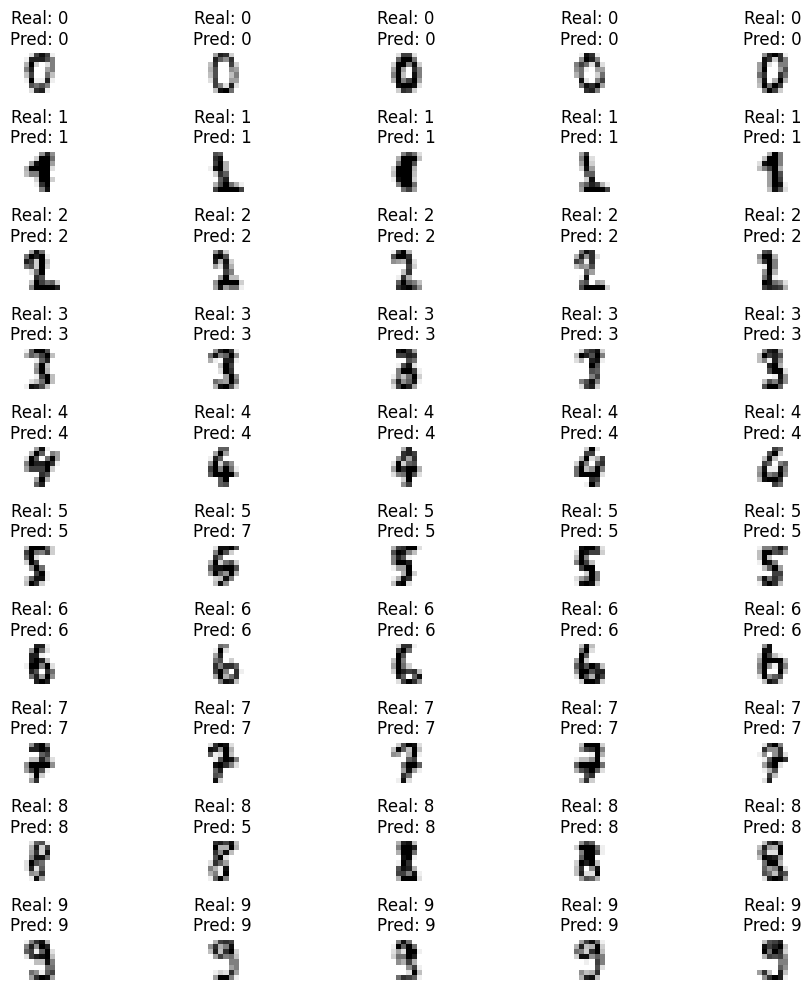

In [95]:
# Number of samples to plot for each digit
num_samples = 5

# Create a figure to plot the samples
fig, axes = plt.subplots(10, num_samples, figsize=(10, 10))

# Plot samples for each digit
for digit in range(10):
    # Get indices for the current digit in the test set
    digit_indices = np.where(y_test == digit)[0]
    selected_indices = np.random.choice(digit_indices, num_samples, replace=False)
    
    for i, ax in enumerate(axes[digit]):
        index = selected_indices[i]
        ax.imshow(X_test[index].reshape(8, 8), cmap='gray_r')
        ax.set_title(f"Real: {y_test[index]}\nPred: {y_pred_all[index]}")
        ax.axis('off')

plt.tight_layout()
plt.show()


### Questions

Provides a detailed description of your results (e.g., in which case the classification performance is better, with ClassifierAll, Classifier1col, Classifier4col, or Classifier8col).

Your response (argue your response):

In the classifier all, the accuracy score is the higher and it is obvius since is the one that uses all data

# PART 4

## Descripción de tu percepcion del nivel de desarrollo de la subcompetencia

### SING0202A Interpretación de variables


Escribe tu description del nivel de logro del siguiente criterio de la subcompetencia

**Interpreta interacciones**. Interpreta interacciones entre variables relevantes en un problema, como base para la construcción de modelos bivariados basados en datos de un fenómeno investigado que le permita reproducir la respuesta del mismo.

Tu respuesta:

La domine completamente 100/100

Escribe tu description del nivel de logro del siguiente criterio de la subcompetencia

**Construcción de modelos**. Es capaz de construir modelos bivariados que expliquen el comportamiento de un fenómeno.

Tu respuesta:

La domine completamente 100/100